<a href="https://colab.research.google.com/github/yadukrishnanp2001/Deep-Learning-Based-Classification-of-Oral-Squamous-Cell-Carcinoma-vs.-Norma/blob/main/Custom%20CNN%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

In [ ]:
# --- Dataset Setup ---
# Download dataset
path = kagglehub.dataset_download("ashenafifasilkebede/dataset")
print("Dataset path:", path)

100%|██████████| 2.93G/2.93G [02:11<00:00, 23.9MB/s]

Extracting files...


Dataset path: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1


In [ ]:
# Define paths
train_dir = os.path.join(path, 'train')
test_dir = os.path.join(path, 'test')
val_dir = os.path.join(path, 'val')

# Verify paths exist
print("\nDirectory structure:")
print(f"Train exists: {os.path.exists(train_dir)}")
print(f"Test exists: {os.path.exists(test_dir)}")
print(f"Val exists: {os.path.exists(val_dir)}")


Directory structure:
Train exists: True
Test exists: True
Val exists: True


In [ ]:
# --- Image Parameters ---
IMG_SIZE = 224
BATCH_SIZE = 64
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# --- Data Generators ---
# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Validation generator (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 4946 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


In [ ]:
# --- CNN Model Architecture ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=INPUT_SHAPE),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# --- Model Compilation ---
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,477,954 (196.37 MB)

 Trainable params: 51,476,482 (196.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
# --- Training ---
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    verbose=1
)

Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.6600 - loss: 7.2199 - val_accuracy: 0.7667 - val_loss: 12.4636
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6951 - loss: 2.9549 - val_accuracy: 0.6167 - val_loss: 3.1045
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.7444 - loss: 2.3459 - val_accuracy: 0.7417 - val_loss: 3.1675
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7601 - loss: 1.9858 - val_accuracy: 0.3667 - val_loss: 2.7684
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.7658 - loss: 1.6407 - val_accuracy: 0.5667 - val_loss: 2.0282
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.7784 - loss: 1.7998 - val_accuracy: 0.6417 - val_loss: 2.0515
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.7854 - loss: 1.7897 - val_accuracy: 0.7333 - val_loss: 1.9531
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.7844 - loss: 1.8331 - val_accuracy: 0.7417 - 

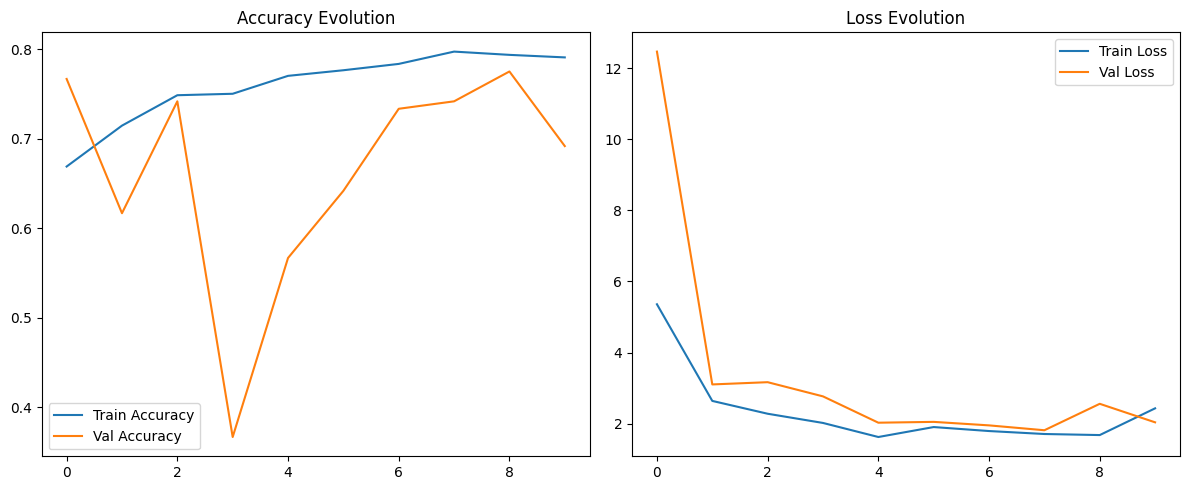

In [ ]:
# --- Training Visualization ---
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Evolution')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Evolution')
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
# --- Evaluation ---
# Train evaluation
train_gen.reset()
train_preds = model.predict(train_gen)
train_pred_classes = np.argmax(train_preds, axis=1)

# Test evaluation
test_gen.reset()
test_preds = model.predict(test_gen)
test_pred_classes = np.argmax(test_preds, axis=1)

# Classification reports
print("\nTraining Report:")
print(classification_report(train_gen.classes, train_pred_classes,
                          target_names=list(train_gen.class_indices.keys())))

print("\nTest Report:")
print(classification_report(test_gen.classes, test_pred_classes,
                          target_names=list(test_gen.class_indices.keys())))

78/78 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 6s/step

Training Report:
              precision    recall  f1-score   support

      Normal       0.49      0.53      0.51      2435
        OSCC       0.51      0.47      0.49      2511

    accuracy                           0.50      4946
   macro avg       0.50      0.50      0.50      4946
weighted avg       0.50      0.50      0.50      4946


Test Report:
              precision    recall  f1-score   support

      Normal       0.64      0.52      0.57        31
        OSCC       0.85      0.91      0.88        95

    accuracy                           0.81       126
   macro avg       0.75      0.71      0.72       126
weighted avg       0.80      0.81      0.80       126



2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


<Axes: >

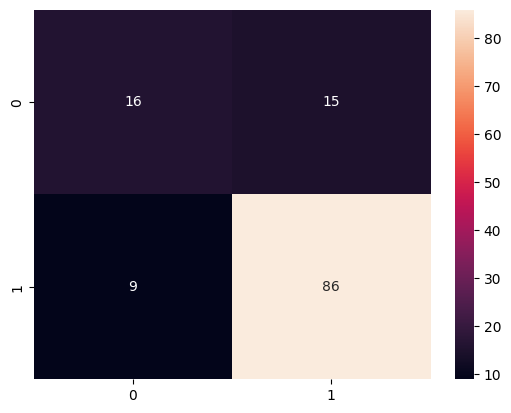

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

# Convert probabilities to class predictions
y_pred_test = model.predict(test_gen)
y_pred_test_int = np.argmax(y_pred_test, axis=1)  # Convert from one-hot encoding
y_test_int = test_gen.classes  # True labels


cm = confusion_matrix(y_test_int, y_pred_test_int)
sn.heatmap(cm,annot=True,fmt="d")